## Customer Revenue prediction

In [393]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [394]:
# DataSet found on Kaggle: https://www.kaggle.com/henrysue/online-shoppers-intention
df = pd.read_csv("/Users/bryt/Desktop/projects/Customer Revenue Prediction Code/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [395]:
df.shape

(12330, 18)

In [396]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [397]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [398]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [399]:
#Check for dupilcates based on specific columns
duplicates_in_columns = df.duplicated()
print("Number of duplicates based on specific columns:", duplicates_in_columns.sum())

Number of duplicates based on specific columns: 125


In [400]:
#Check and handle duplicates
print(f"Total rows before cleaning: {len(df)}")
duplicates_count = df.duplicated().sum()
print(f"Duplicated rows found: {duplicates_count}")

if duplicates_count > 0:
    df = df.drop_duplicates()
    print(f"Total rows after removing duplicates: {len(df)}")

Total rows before cleaning: 12330
Duplicated rows found: 125
Total rows after removing duplicates: 12205


<Axes: xlabel='BounceRates', ylabel='ExitRates'>

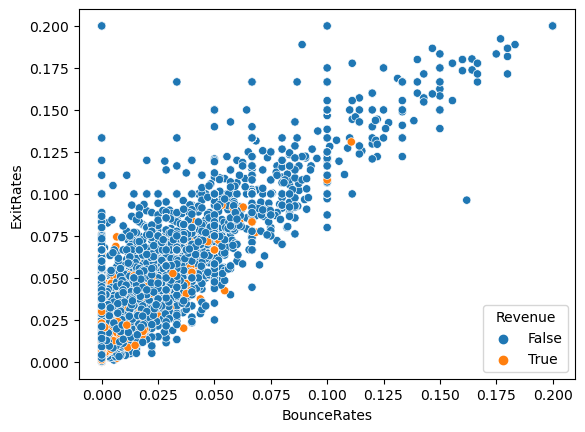

In [401]:
sns.scatterplot (data = df, x = "BounceRates", y = "ExitRates", hue = "Revenue")

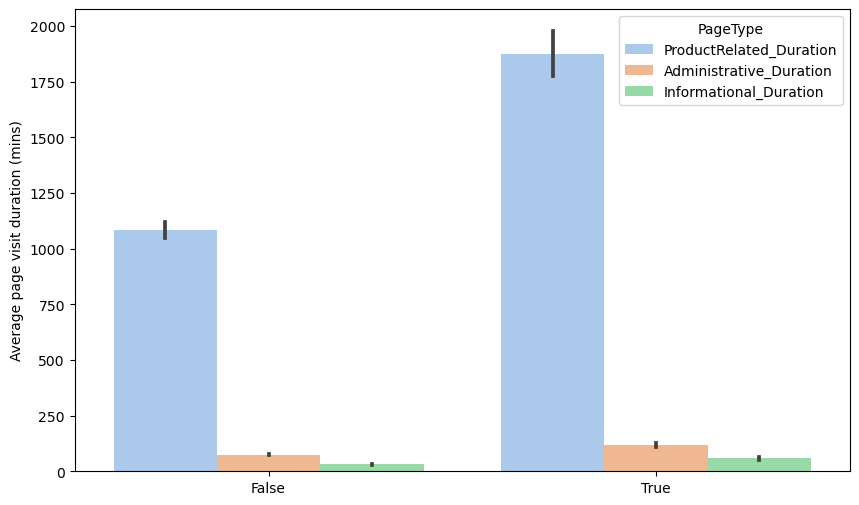

In [402]:
#Melt the dataframe for easy plotting
melt_page_dur_cnt = df.melt(id_vars='Revenue',
                                      value_vars=[ 'ProductRelated_Duration', 'Administrative_Duration', 'Informational_Duration'],
                                      var_name='PageType', value_name='TotalDuration')

plt.figure(figsize=(10, 6))
sns.barplot(data=melt_page_dur_cnt,
            x='Revenue',
            y='TotalDuration',
            hue='PageType',
            palette='pastel')
plt.xlabel('')
plt.ylabel('Average page visit duration (mins)')
plt.show()

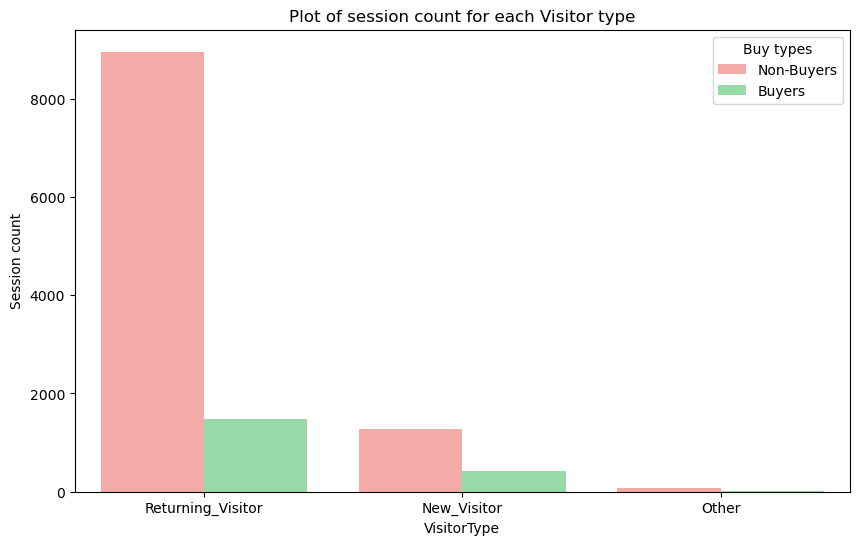

In [403]:
#Group df
visitor_df = df.groupby(['VisitorType', 'Revenue'])['Revenue'].size().reset_index(name='cnt').sort_values('cnt', ascending=False)

#Change name
visitor_df.loc[visitor_df['Revenue']==True, 'Revenue']  = 'Buyers'
visitor_df.loc[visitor_df['Revenue']==False, 'Revenue'] = 'Non-Buyers'

#Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')[2:4][::-1]
sns.barplot(data=visitor_df,
            x='VisitorType',
            y='cnt',
            hue='Revenue',
            palette=colors)
plt.legend(title='Buy types')
plt.ylabel("Session count")
plt.title("Plot of session count for each Visitor type")
plt.show()

In [404]:
weekend_df = df.groupby(['Weekend', 'Revenue']).size().reset_index(name='cnt')
weekend_df = weekend_df.pivot(index='Weekend', columns='Revenue', values='cnt')
# Rename the columns
weekend_df = weekend_df.rename(columns={True: 'Buyers', False: 'Non-Buyers'})
weekend_df.columns = [''.join(col).strip() for col in weekend_df.columns.values] #flattern column level

# Rename the index
weekend_df = weekend_df.rename(index={True: 'Week_end', False: 'Week_day'})

weekend_df['BuyersPct'] = weekend_df['Buyers'] / (weekend_df['Buyers'] + weekend_df['Non-Buyers']) * 100
weekend_df

,Non-Buyers,Buyers,BuyersPct
Weekend,,,
Week_day,7937,1409,15.075968
Week_end,2360,499,17.453655


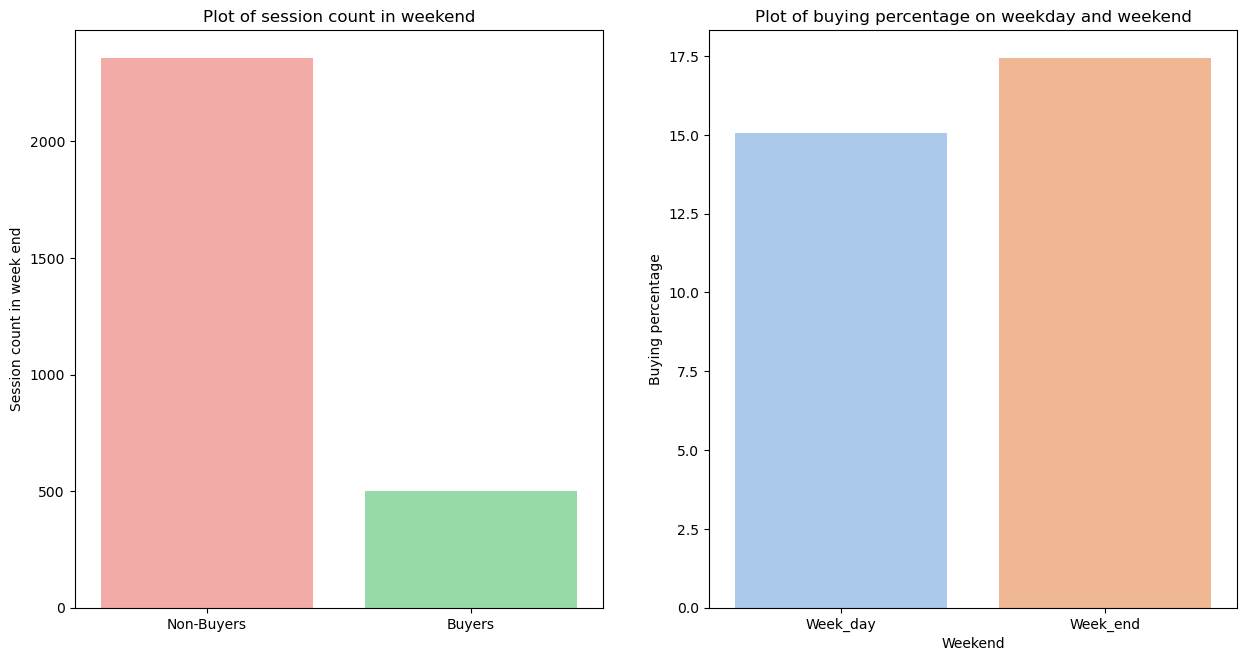

In [405]:
colors = sns.color_palette('pastel')[2:4][::-1]
plt.figure(figsize=(15, 7.5))
plt.subplot(1, 2, 1)
ax1=sns.barplot(x=weekend_df.loc['Week_end', ['Non-Buyers', 'Buyers']].index,
            y=weekend_df.loc['Week_end', ['Non-Buyers', 'Buyers']].values,
            palette=colors)
plt.ylabel("Session count in week end")
ax1.set_title("Plot of session count in weekend")


plt.subplot(1, 2, 2)
ax2=sns.barplot(x=weekend_df.index,
            y=weekend_df['BuyersPct'],
            palette='pastel')
plt.ylabel("Buying percentage")
ax2.set_title("Plot of buying percentage on weekday and weekend")

plt.show()

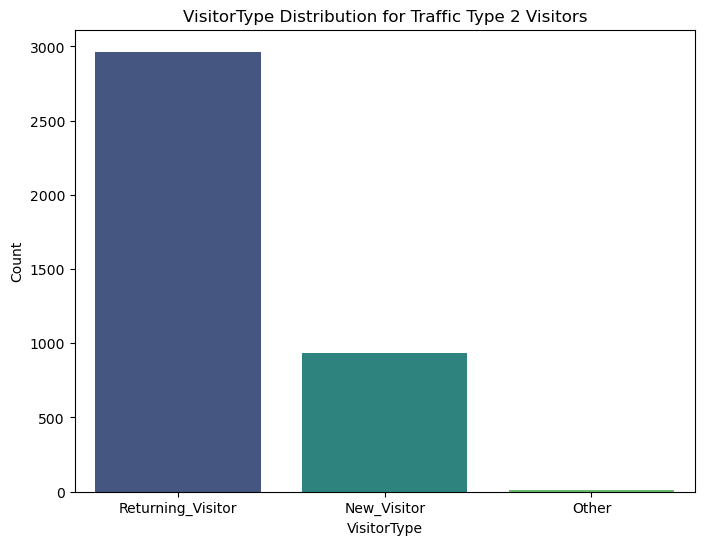

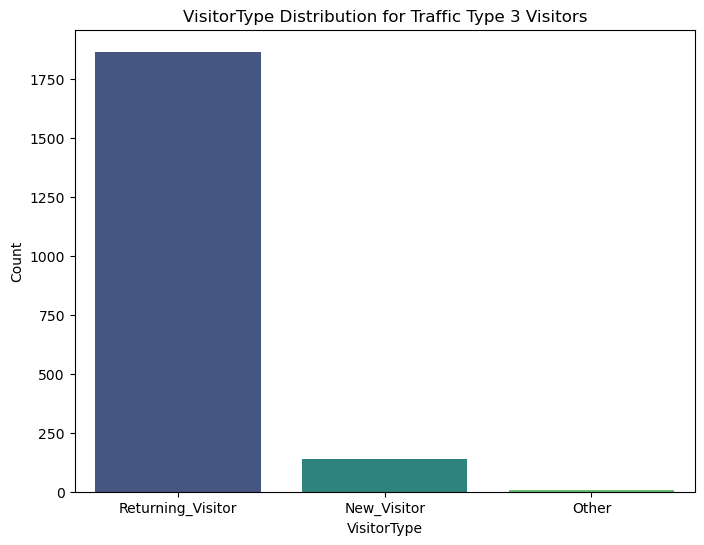

In [406]:
# Filter the dataset for Traffic Type 2 visitors
traffic_type_2_df = df[df['TrafficType'] == 2]

# Filter the dataset for Traffic Type 3 visitors
traffic_type_3_df = df[df['TrafficType'] == 3]

# Demographic analysis
demographic_variables = ['VisitorType']

for variable in demographic_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type_2_df, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type_3_df, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

In [407]:
df[["ProductRelated", "BounceRates", "ExitRates"]].sort_values("ProductRelated", ascending=False).head(10)

,ProductRelated,BounceRates,ExitRates
5152,705,0.004851,0.015431
6684,686,0.009853,0.022771
8308,584,0.002099,0.009347
10318,534,0.010857,0.023309
6787,518,0.000038,0.003837
8784,517,0.004385,0.014594
8972,501,0.003965,0.014292
6165,486,0.000324,0.011249
10350,470,0.000000,0.003621
8071,449,0.000764,0.027701


<Axes: >

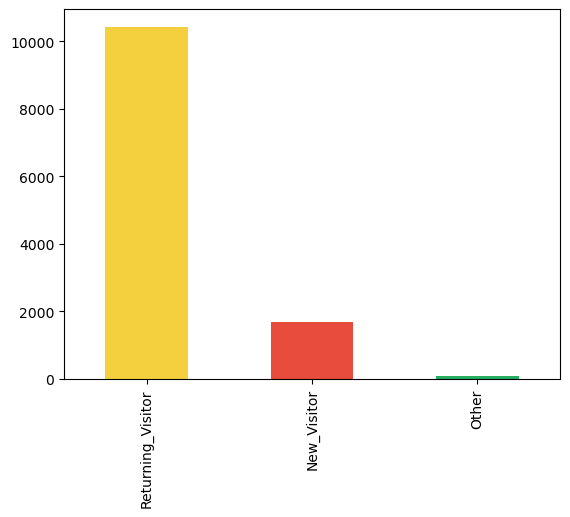

In [408]:
df["VisitorType"].value_counts().plot.bar(color=["#f4d03f","#e74c3c","#27ae60"])

<Axes: xlabel='ProductRelated_Duration', ylabel='VisitorType'>

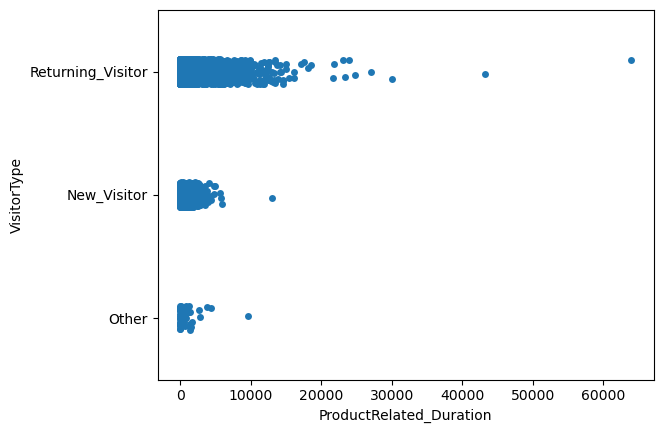

In [409]:
sns.stripplot(x=df["ProductRelated_Duration"],y=df["VisitorType"])

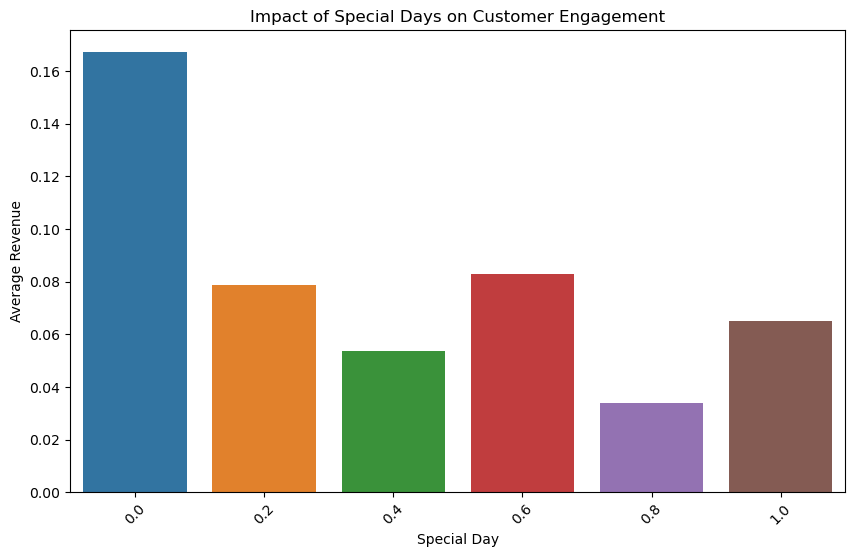

Special Days with the Highest Impact on Customer Engagement:
- 0.0: 0.1671230376049653
- 0.6: 0.08285714285714285
- 0.2: 0.07865168539325842


In [410]:
# Group the data by 'SpecialDay' and calculate the average revenue or visitor count
special_day_analysis = df.groupby('SpecialDay')['Revenue'].mean()  

# Sort the data in descending order based on the average revenue or visitor count
special_day_analysis = special_day_analysis.sort_values(ascending=False)

# Visualize the impact of special days on customer engagement
plt.figure(figsize=(10, 6))
sns.barplot(x=special_day_analysis.index, y=special_day_analysis.values)
plt.title("Impact of Special Days on Customer Engagement")
plt.xlabel("Special Day")
plt.ylabel("Average Revenue" )
plt.xticks(rotation=45)
plt.show()

# Identify the special days with the highest impact on customer engagement
top_special_days = special_day_analysis.head(3)  

print("Special Days with the Highest Impact on Customer Engagement:")
for day, impact in top_special_days.items():
    print(f"- {day}: {impact}")

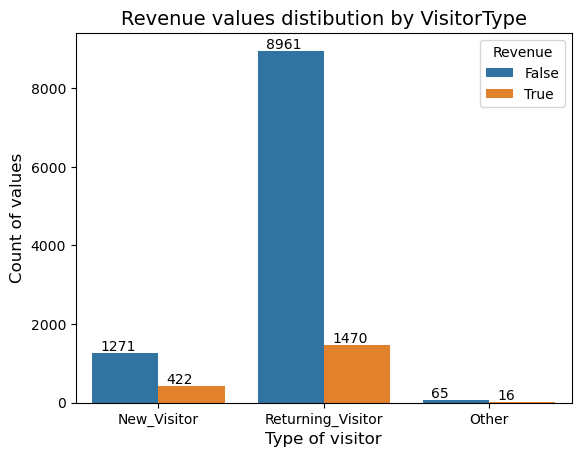

In [411]:
#Revenue value distribution by visitor type
ax = sns.countplot(df, x ='VisitorType', hue = 'Revenue',  order= ['New_Visitor', 'Returning_Visitor', 'Other'])
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", xy=(p.get_x()+0.05, p.get_height()+50))
plt.ylabel('Count of values', size=12)
plt.xlabel('Type of visitor', size=12)
plt.title('Revenue values distibution by VisitorType', size = 14)
plt.show()

### Data preprocessing

/var/folders/mq/rlbb6pp15bx1slmgv7v34x9w0000gn/T/ipykernel_1700/682187120.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


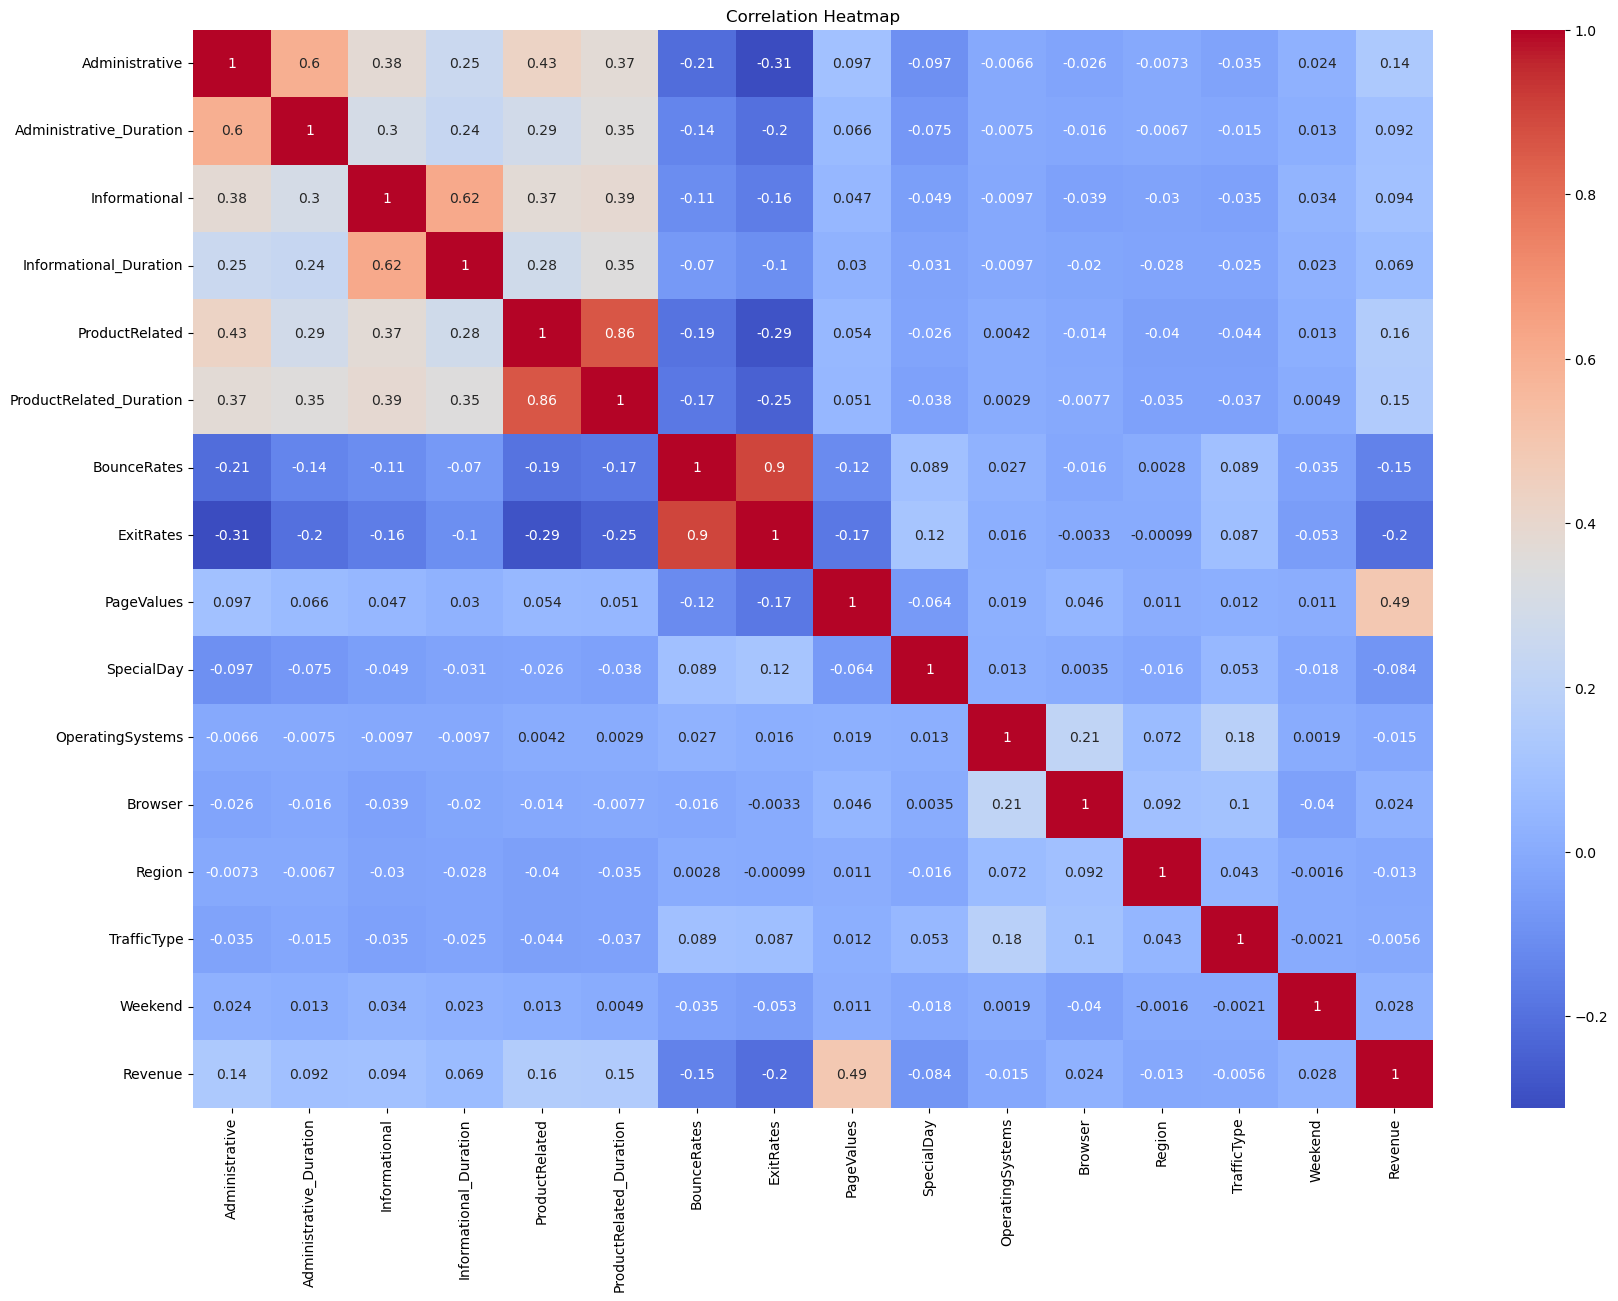

In [412]:
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Find out about categorical data

In [413]:
df = df.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis = 1)

In [414]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [415]:
df['ProductRelated'].value_counts() # a categorical type but the data is too spread (ranges from 1 too 399)

1      504
3      458
2      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

In [416]:
df['Month'].value_counts()

May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64

In [417]:
df['VisitorType'].value_counts() #Suitable categorical variable

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

In [418]:
#Using get_dummies
visitor = pd.get_dummies(df['VisitorType'])
X = pd.concat([df, visitor], axis=1)
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0,1
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0,1
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0,1
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0,1
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0,1


In [419]:
# Removing redundant features
X.columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [420]:
y = X['Revenue']
X_new = X.drop(['Revenue','Month','VisitorType'], axis = 1)

#X_new = X.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)

In [421]:
#Convert boolean values to float type for use by sequential model
X_new['Weekend'] = np.asarray(X_new['Weekend']).astype(np.float32)

y = np.asarray(y).astype(np.float32)

In [422]:
y.shape

(12205,)

In [423]:
X_new.shape

(12205, 15)

In [424]:
#Build the model
model = Sequential()
model.add(Dense(units=18,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=16,activation="relu"))

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Last layer for multi-class classification of 3 species
model.add(Dense(units=2,activation="softmax"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [425]:
model.fit(X_train,y_train,epochs=10, batch_size=32)

Epoch 1/10
267/267 [==============================] - 2s 3ms/step - loss: 0.7930 - accuracy: 0.8242
Epoch 2/10
267/267 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.8633
Epoch 3/10
267/267 [==============================] - 1s 3ms/step - loss: 0.4199 - accuracy: 0.8655
Epoch 4/10
267/267 [==============================] - 1s 3ms/step - loss: 0.3655 - accuracy: 0.8726
Epoch 5/10
267/267 [==============================] - 1s 3ms/step - loss: 0.3772 - accuracy: 0.8717
Epoch 6/10
267/267 [==============================] - 1s 2ms/step - loss: 0.3437 - accuracy: 0.8800
Epoch 7/10
267/267 [==============================] - 1s 3ms/step - loss: 0.3724 - accuracy: 0.8739
Epoch 8/10
267/267 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8793
Epoch 9/10
267/267 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8783
Epoch 10/10
267/267 [==============================] - 1s 4ms/step - loss: 0.3161 - accuracy: 0.8799

### Get Predictions

In [429]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set only!
y_probs = model.predict(X_test)

# Use argmax to get class predictions
y_pred = np.argmax(y_probs, axis=1)


115/115 [==============================] - 0s 2ms/step


In [430]:
#Evaluate Precision, Recall, F1-score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

Precision: 0.66
Recall:    0.54
F1 Score:  0.59


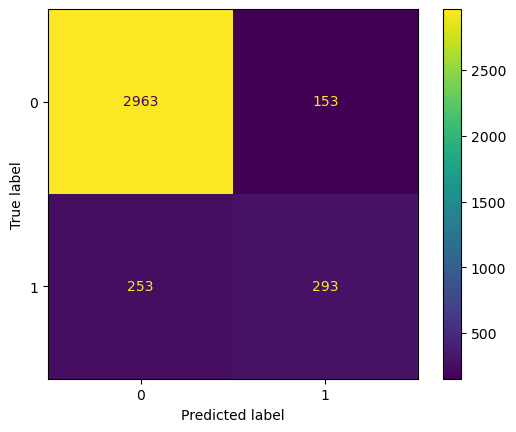

In [431]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


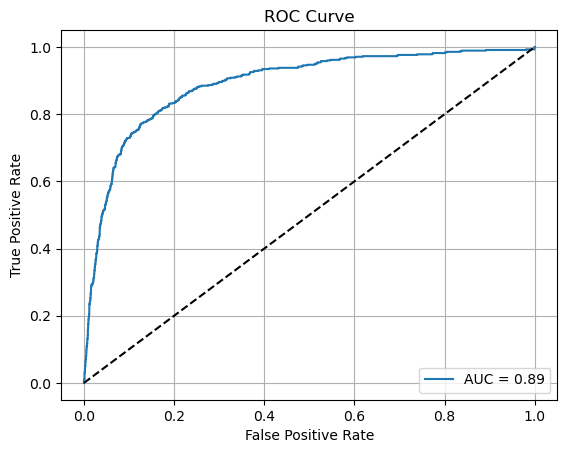

In [433]:
#ROC Curve and AUC Score

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_score should be probability of class 1
y_score = y_probs[:, 1]  # Take only second column

# If y_test is one-hot encoded (2D), convert to labels
if y_test.ndim > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [434]:
model.save('customer_shopping-intention_model.h5')


/Users/bryt/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
